## EdSigh Ed-Tech Analysis


### Objective of this analysis includes:

#### To gain insights into the business and improve efficiency
#### To understand performance of each course
#### To determine relationship between cost of enrolling in a course and number of students enrolled in the course.

### Data source: The data was provided by the company from their e-learning platform. Below are the features and their meaning
#### Course_ID: unique identifier assigned to each course in the dataset. It is used to distinguish and track individual courses.
#### Num_Subscribers: number of subscribers or students enrolled in a particular course.
#### Course_Title: name or title of a specific course in the dataset. It briefly describes the subject matter or topic covered by the course.
#### Price: cost or fee associated with enrolling in a course.
#### Num_Review: number of reviews or feedback received for a course. It reflects the level of engagement and satisfaction among learners who have completed or interacted with the course content.
#### Num_Lectures: total number of lectures or instructional sessions included in a course.
#### Level: denotes the difficulty or proficiency level of a course. It categorizes courses into different skill levels, such as beginner, intermediate, or advanced, to guide learners in selecting courses aligned with their abilities.
#### Rating: overall rating or evaluation of a course based on learners' feedback or reviews, between 0 and 1
#### Content_Duration: specifies the total duration or length of the course content in terms of hours or minutes. It gives learners an estimate of the time commitment required to complete the course.
#### Published_Timestamp: denotes the date and time when a course was published or made available to learners. It serves as a reference point for tracking the course's age and relevance.
#### Subject: specific field or discipline to which a course belongs. It categorizes courses based on their topic or subject matter, such as Web Development, Musical Instrument, etc.
#### Date_Published: specific date when a course was published or made available to learners.
#### Course_Type: the type of a course, if Free or Paid for.




## Import neccesary libraries and data

In [1]:
#Import all the neccessary libraries

import pandas as pd       #used for Data preprocessing              
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt     #used for data visualisation
%matplotlib inline   
import missingno as msno             #missing data
sns.set()
import collections as Counter
from subprocess import check_output     #for viewing profile report
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Upload the data

df = pd.read_csv(r"C:\Users\Windows\Downloads\EdSigh Ed-Tech P1.csv")

## Data Understanding/Overview

In [3]:
df.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,04-07-13,Free


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course_ID            3676 non-null   int64  
 1   Num_Subscribers      3676 non-null   int64  
 2   Course_Title         3676 non-null   object 
 3   Price                3676 non-null   int64  
 4   Num_Review           3676 non-null   int64  
 5   Num_Lectures         3676 non-null   int64  
 6   Level                3676 non-null   object 
 7   Rating               3676 non-null   float64
 8   Content_Duration     3676 non-null   float64
 9   Published_Timestamp  3676 non-null   object 
 10  Subject              3676 non-null   object 
 11  Date_Published       3676 non-null   object 
 12  Course_Type          3676 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 373.5+ KB


### Insights

### The dataset consist of 13 columnns with both categorical and numerical data, and no missing values

In [5]:
df.shape

(3676, 13)

### There are 3,676 rows and 13 columns

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Course_ID,3676.0,NaN,NaN,NaN,675753.495103,343130.440299,8324.0,407474.0,687692.0,960814.0,1282064.0
Num_Subscribers,3676.0,NaN,NaN,NaN,3199.260881,9486.582966,0.0,112.0,912.5,2558.0,268923.0
Course_Title,3676,3663,Acoustic Blues Guitar Lessons,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,3676.0,NaN,NaN,NaN,66.115343,61.056073,0.0,20.0,45.0,95.0,200.0
Num_Review,3676.0,NaN,NaN,NaN,156.309848,935.674518,0.0,4.0,18.0,67.0,27445.0
Num_Lectures,3676.0,NaN,NaN,NaN,40.129761,50.398507,0.0,15.0,25.0,46.0,779.0
Level,3676,4,All Levels,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,3676.0,NaN,NaN,NaN,0.610868,0.334287,0.0,0.28,0.76,0.93,1.0
Content_Duration,3676.0,NaN,NaN,NaN,4.096137,6.054948,0.0,1.0,2.0,4.5,78.5
Published_Timestamp,3676,3672,2017-02-07T17:20:39Z,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Insights

### The statistical overview shows that EdSigh Ed-Tech offers about 3,663 courses, across 4 different fields of study. The courses are either paid or free, but most of the students offer courses under the Web development field.

In [7]:
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

### There are no duplicates

In [9]:
#from pandas_profiling import ProfileReport
#df_profile = ProfileReport(df, title="EdSigh Ed-Tech Data profile")
#df_profile

## Data Cleaning

In [10]:
#making a copy of the dataset
df_copy = df.copy()
df_copy.head(2)

,Course_ID,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,49798,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,48841,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,04-07-13,Free


In [11]:
#Checking for missing data
df.isnull().sum()

Course_ID              0
Num_Subscribers        0
Course_Title           0
Price                  0
Num_Review             0
Num_Lectures           0
Level                  0
Rating                 0
Content_Duration       0
Published_Timestamp    0
Subject                0
Date_Published         0
Course_Type            0
dtype: int64

<Axes: >

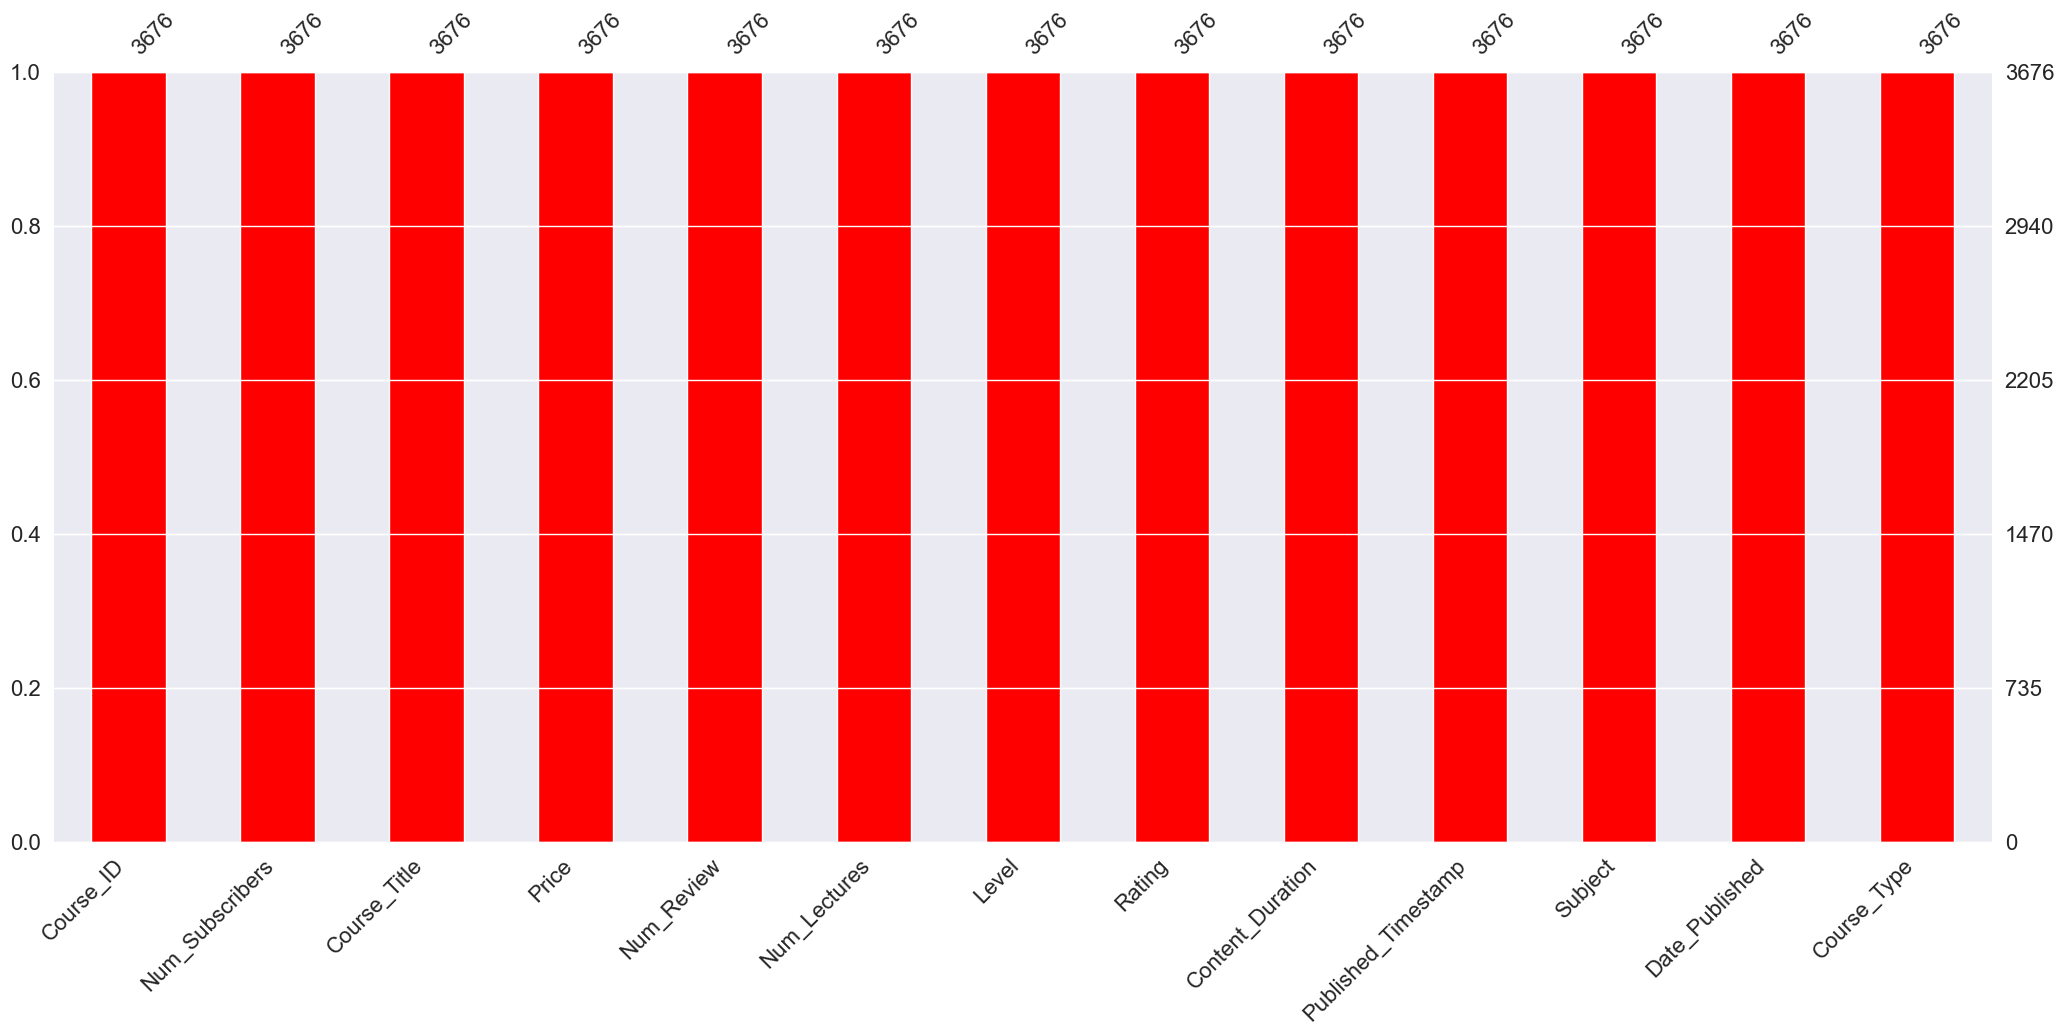

In [12]:
#Visualising of missing data
msno.bar(df, color="red")

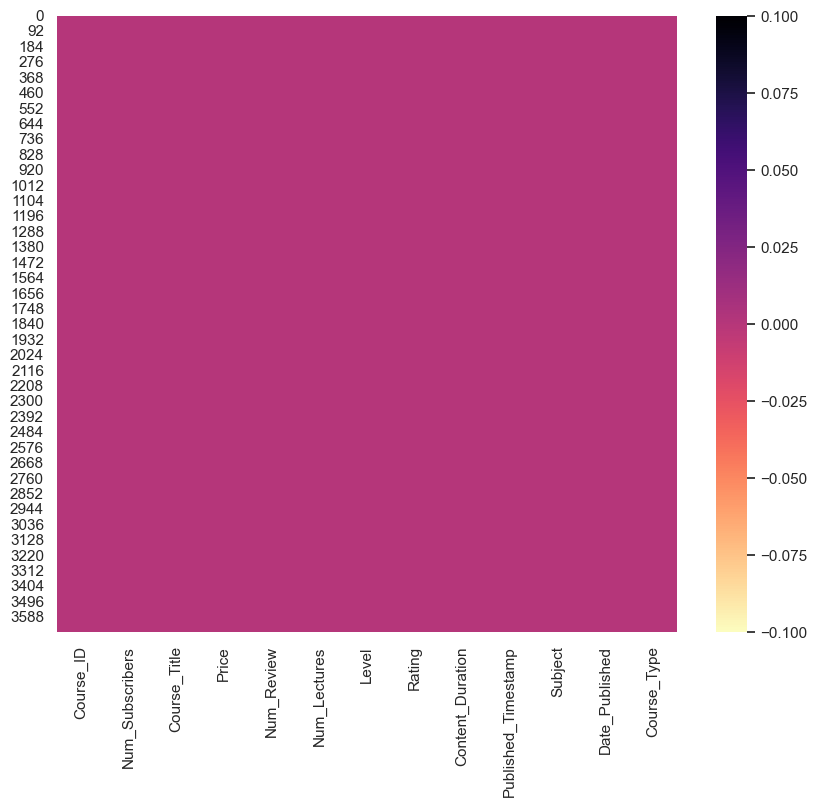

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=True, cmap="magma_r");

### The visuals above shows that there are no missing values

## Feature Engineering

In [14]:
#To see the various features
df.columns

Index(['Course_ID', 'Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type'],
      dtype='object')

In [15]:
#Drop feature with unique values e.g Course_ID
df.drop(df.columns[0], axis=1, inplace=True)

In [16]:
df.head(2)

,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type
0,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free
1,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,04-07-13,Free


In [17]:
#Group the Rating into 5stars,4stars,3stars,2stars and 1star
def star_rating(Rating):
    if Rating <= 0.2:
        return "1star"
    elif Rating <= 0.4:
        return "2stars"
    elif Rating <= 0.6:
        return "3stars"
    elif Rating <= 0.8:
        return "4stars"
    else:
        return "5stars"
    
df["star_rating_label"] = df["Rating"].apply(star_rating);


#Group the Price into Free, Budget friendly, Moderate and Premium
def Price_gp(Price):
    if Price < 1:
        return "Free"
    if Price <= 70:
        return "<=70 Budget Friendly"
    if Price <= 140:
        return "<= 140 Moderate"
    if Price <= 210:
        return "<= 210 Premium"
    
df["Price_gp"] = df["Price"].apply(Price_gp);


#Calculating the Revenue made from each course
df["Revenue"] = df["Num_Subscribers"] * df["Price"]


#Group the Content Duration into short, medium and long course
def Duration_gp(Content_Duration):
    if Content_Duration <= 26:
        return "<= 26minsShort_Course"
    elif Content_Duration <= 53:
        return "<= 53minsMedium_Course"
    else:
        return "<= 79minsLong_Course"
    
df["Duration_gp"] = df["Content_Duration"].apply(Duration_gp);


df.head(2)

,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,Date_Published,Course_Type,star_rating_label,Price_gp,Revenue,Duration_gp
0,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance,4/20/2013,Free,3stars,Free,0,<= 26minsShort_Course
1,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance,04-07-13,Free,5stars,Free,0,<= 26minsShort_Course


In [18]:
# convert the time features from object to date time
df["Published_Timestamp"] = pd.to_datetime(df["Published_Timestamp"])
df["Date_Published"] = pd.to_datetime(df["Date_Published"])

In [19]:
#To verify the time feature has been converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3676 entries, 0 to 3675
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Num_Subscribers      3676 non-null   int64              
 1   Course_Title         3676 non-null   object             
 2   Price                3676 non-null   int64              
 3   Num_Review           3676 non-null   int64              
 4   Num_Lectures         3676 non-null   int64              
 5   Level                3676 non-null   object             
 6   Rating               3676 non-null   float64            
 7   Content_Duration     3676 non-null   float64            
 8   Published_Timestamp  3676 non-null   datetime64[ns, UTC]
 9   Subject              3676 non-null   object             
 10  Date_Published       3676 non-null   datetime64[ns]     
 11  Course_Type          3676 non-null   object             
 12  star_rating_label   

In [20]:
# To extract time, month, season, year

df["Published_Time"] = df["Published_Timestamp"].dt.time
df["Published_hour"] = df["Published_Timestamp"].dt.hour
df["Published_dayofweek"] = df["Published_Timestamp"].dt.dayofweek
df["Published_day_name"] = df["Published_Timestamp"].dt.day_name()
df["Published_Month"] = df["Published_Timestamp"].dt.month
df["Published_Mth_name"] = df["Published_Timestamp"].dt.month_name()
df["Published_Year"] = df["Published_Timestamp"].dt.year

df.head(2)

,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,...,Price_gp,Revenue,Duration_gp,Published_Time,Published_hour,Published_dayofweek,Published_day_name,Published_Month,Published_Mth_name,Published_Year
0,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20 02:25:22+00:00,Business Finance,...,Free,0,<= 26minsShort_Course,02:25:22,2,5,Saturday,4,April,2013
1,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07 21:39:25+00:00,Business Finance,...,Free,0,<= 26minsShort_Course,21:39:25,21,6,Sunday,4,April,2013


In [21]:
# Grouping time of the day into morning, afternoon, evening,and night
def time_of_day(Published_Time):
    if Published_Time in [5,6,7,8,9,10,11,12]:
           return "Morning"
    elif Published_Time in [13,14,15,16,17,]:
            return "Afternoon"
    elif Published_Time in [18,19,20,21]:
            return "Evening"
    elif Published_Time in [22,23,24,0,1,2,3,4]:
            return "Night"
    else:
            return "invalid day"
        
df["time_of_day_label"] = df["Published_hour"].apply(time_of_day)
df.head(2)

,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,...,Revenue,Duration_gp,Published_Time,Published_hour,Published_dayofweek,Published_day_name,Published_Month,Published_Mth_name,Published_Year,time_of_day_label
0,65576,Bitcoin or How I Learned to Stop Worrying and ...,0,936,24,All Levels,0.56,8.0,2013-04-20 02:25:22+00:00,Business Finance,...,0,<= 26minsShort_Course,02:25:22,2,5,Saturday,4,April,2013,Night
1,56659,Accounting in 60 Minutes - A Brief Introduction,0,4397,16,Beginner Level,0.95,1.5,2013-04-07 21:39:25+00:00,Business Finance,...,0,<= 26minsShort_Course,21:39:25,21,6,Sunday,4,April,2013,Evening


## EXPLORATORY DATA ANALYSIS

## 1.Univariate Analysis- showing the distribution of some feature, to gain insights into the dataset

In [22]:
df.columns

Index(['Num_Subscribers', 'Course_Title', 'Price', 'Num_Review',
       'Num_Lectures', 'Level', 'Rating', 'Content_Duration',
       'Published_Timestamp', 'Subject', 'Date_Published', 'Course_Type',
       'star_rating_label', 'Price_gp', 'Revenue', 'Duration_gp',
       'Published_Time', 'Published_hour', 'Published_dayofweek',
       'Published_day_name', 'Published_Month', 'Published_Mth_name',
       'Published_Year', 'time_of_day_label'],
      dtype='object')

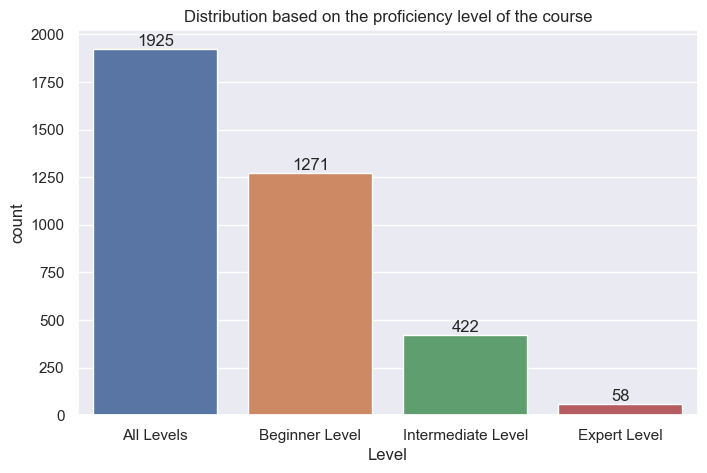

In [23]:
#Number of courses based on individual's abilities or the course proficiency
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Level", order=df["Level"].value_counts(ascending=False).index)
plt.title("Distribution based on the proficiency level of the course")
values=df["Level"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


In [24]:
df["Level"].value_counts().sum()

3676

### Insights
### About 52% of the online courses are categorised under the "All levels", while about 1.58% are categorised under "Expert level"

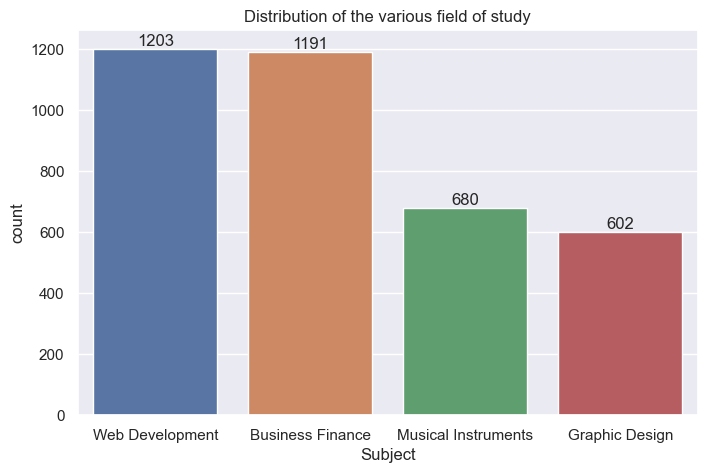

In [25]:
#Number of courses based on field of study
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Subject", order=df["Subject"].value_counts(ascending=False).index)
plt.title("Distribution of the various field of study")
values=df["Subject"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


In [26]:
df["Subject"].value_counts().sum()

3676

### Insights

### About 32.8% and 32.4% of the courses are Web Development and Business Finance courses respectively, while the least 16.4% is Graphic Design

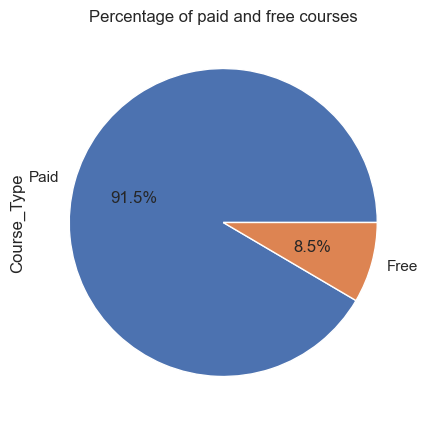

In [68]:
### Percentage of paid and free courses
plt.figure(figsize=(8,5))
ax = df["Course_Type"].value_counts().plot.pie(autopct="%2.1f%%")
ax.set_title("Percentage of paid and free courses");

### Insights

### 91.5% of the courses is paid while 8.5% is free

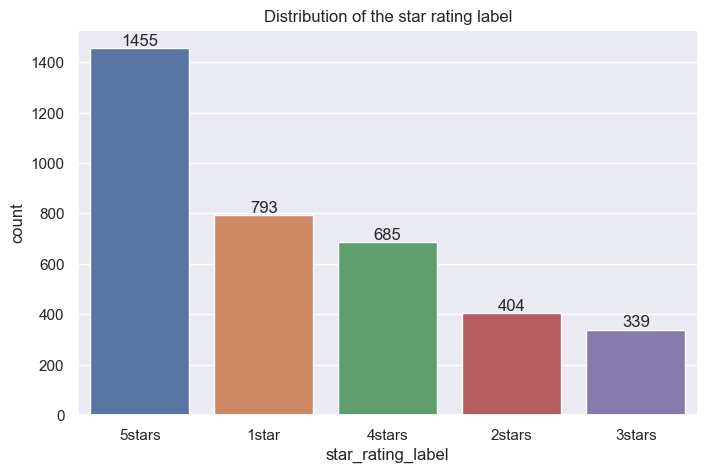

In [27]:
#Distribution of course rating
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="star_rating_label", order=df["star_rating_label"].value_counts(ascending=False).index)
plt.title("Distribution of the star rating label")
values=df["star_rating_label"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


### Most of the courses were rated 5 stars(between 0.8-1)

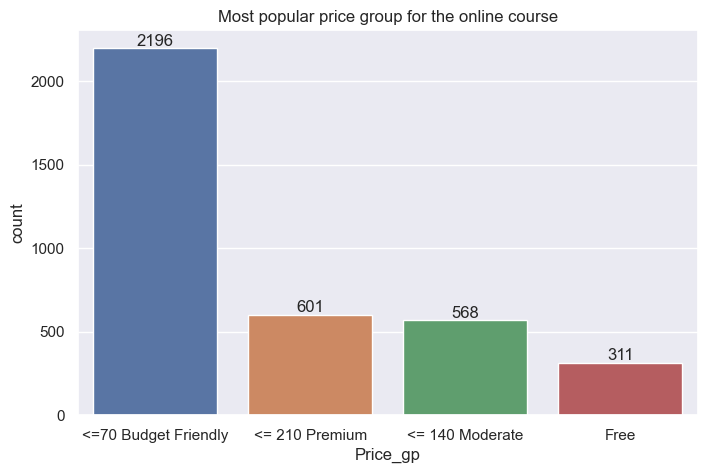

In [28]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Price_gp", order=df["Price_gp"].value_counts(ascending=False).index)
plt.title("Most popular price group for the online course")
values=df["Price_gp"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


### The cost or price for majority(above 50%) of the courses fall below 70

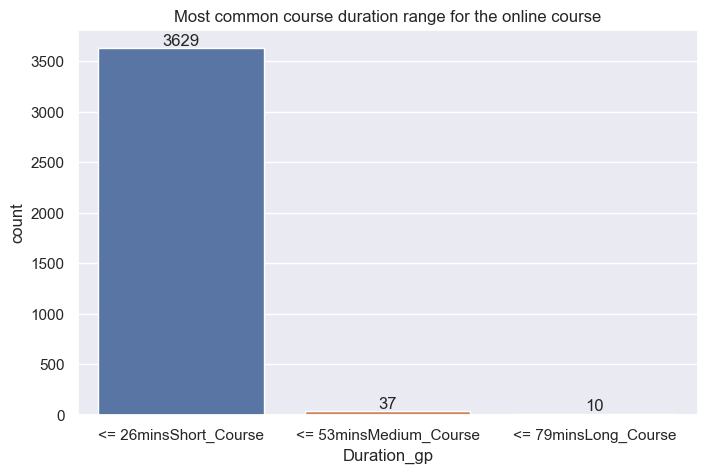

In [29]:
#Course duration range
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Duration_gp", order=df["Duration_gp"].value_counts(ascending=False).index)
plt.title("Most common course duration range for the online course")
values=df["Duration_gp"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


### 98% of the courses have a duration of below 26minutes

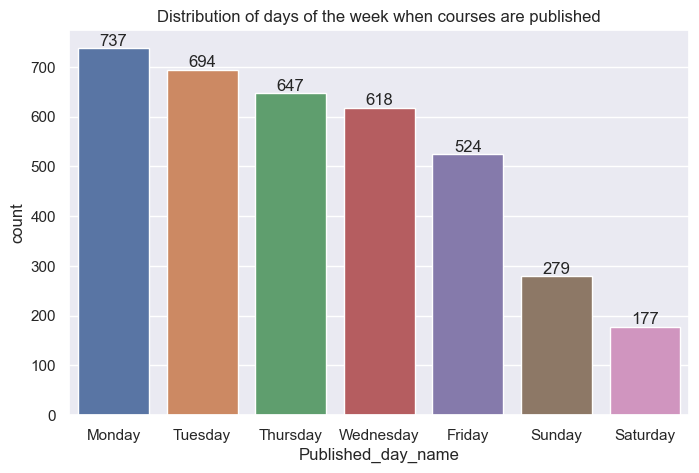

In [30]:
#Days of the week when courses are published
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Published_day_name", order=df["Published_day_name"].value_counts(ascending=False).index)
plt.title("Distribution of days of the week when courses are published")
values=df["Published_day_name"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


### Few courses are published on Sunday and Saturday compared to other days of the week

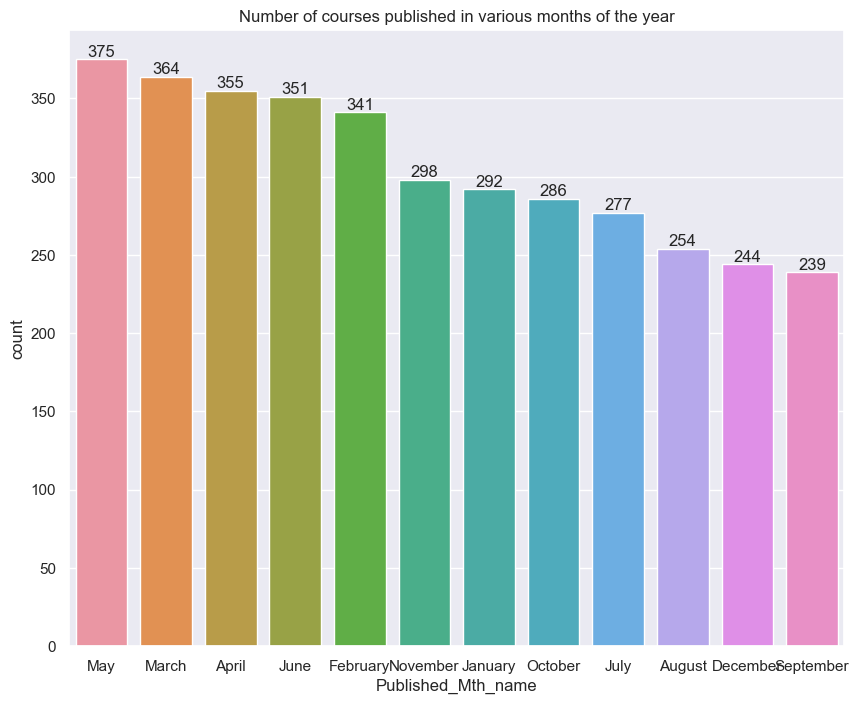

In [31]:
#Distribution of courses published in various months of the year
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df, x="Published_Mth_name", order=df["Published_Mth_name"].value_counts(ascending=False).index)
plt.title("Number of courses published in various months of the year")
values=df["Published_Mth_name"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");


### Most of the courses are published in May, March and April

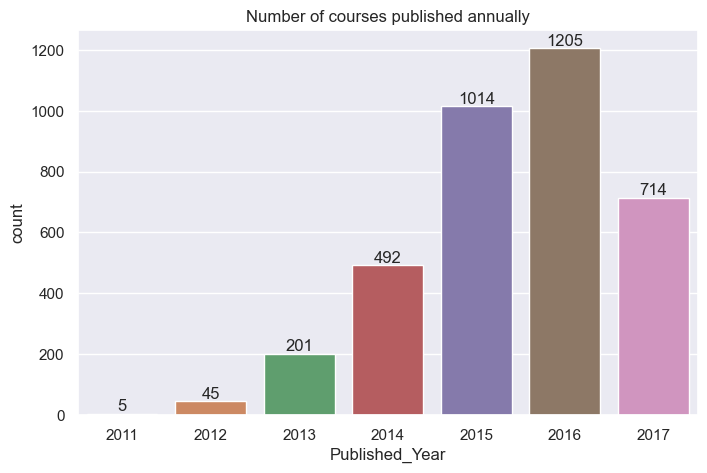

In [32]:
#Number of courses published annually
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Published_Year")
plt.title("Number of courses published annually")
values=df["Published_Year"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");

### EdSigh company increased the number of published course from 5 to 1205, between 2011 and 2016, but reduced the  number to 714 (41% less than the previous year), in 2017.

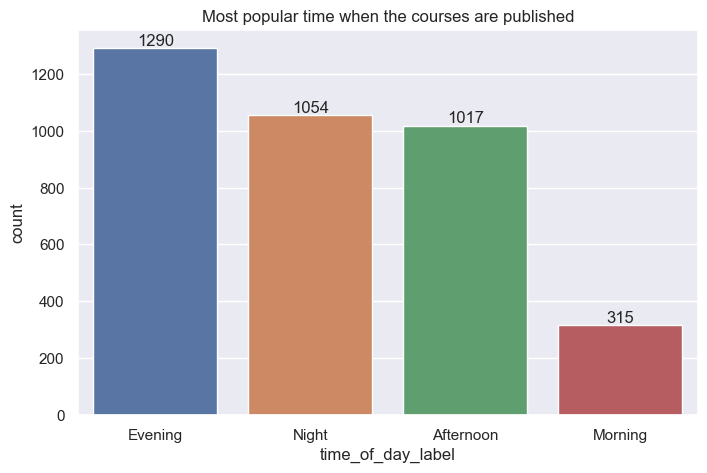

In [33]:
#Time of the day when courses are nostly published
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="time_of_day_label", order=df["time_of_day_label"].value_counts(ascending=False).index)
plt.title("Most popular time when the courses are published")
values=df["time_of_day_label"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");

### Very few courses are published in the morning compared to the rest of the day.

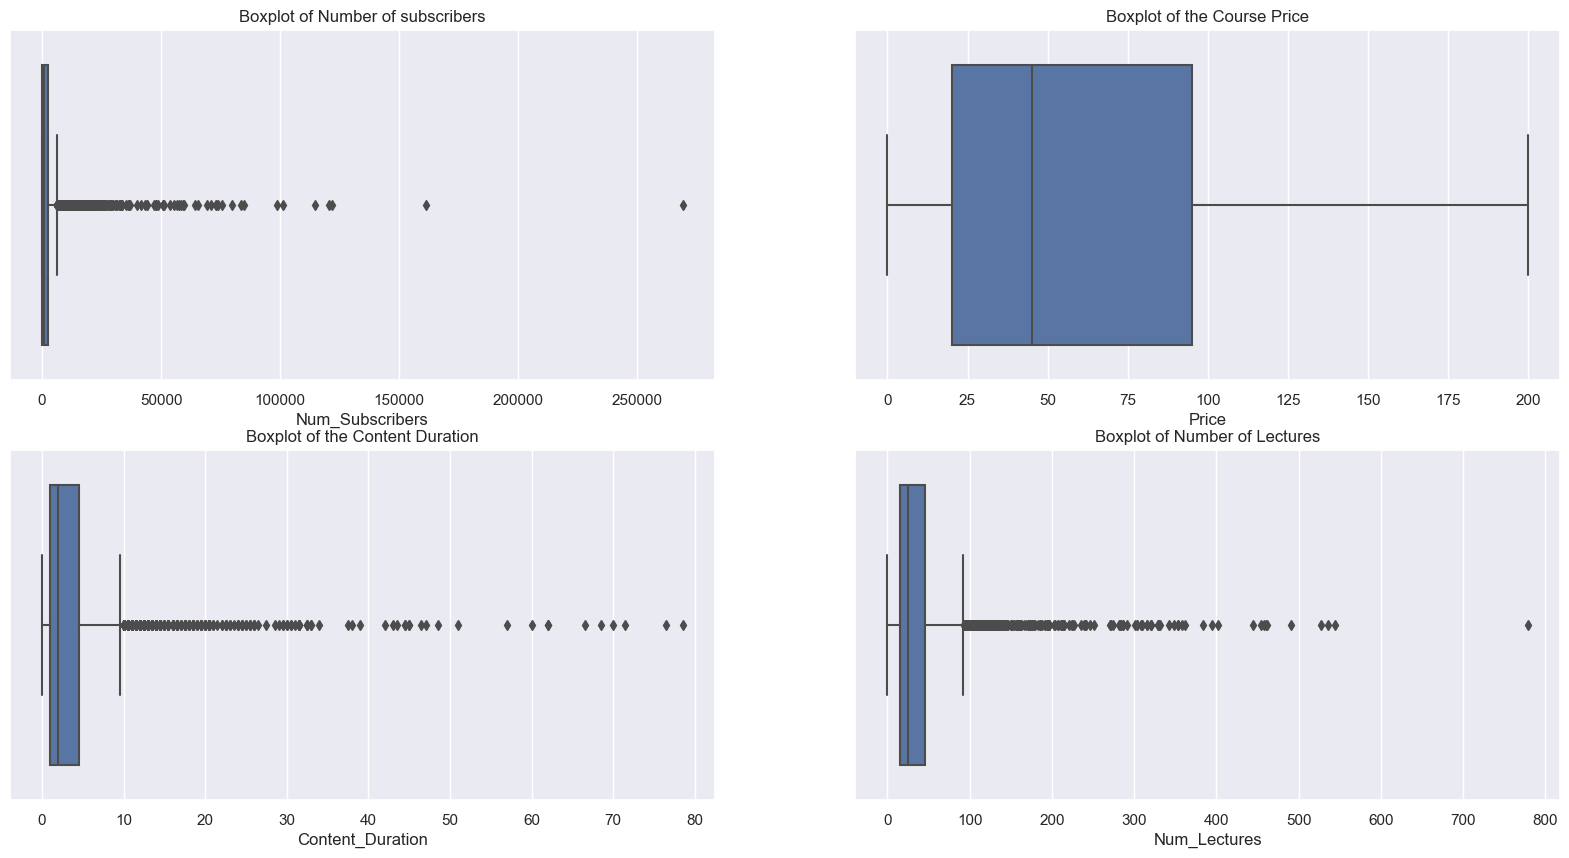

In [34]:
#Boxplots of number of subscribers, Price, Content duration and number of lectures

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

ax=sns.boxplot(data=df, x= "Num_Subscribers", ax=axs[0,0])
axs[0,0].set_title("Boxplot of Number of subscribers")

ax=sns.boxplot(data=df, x= "Price", ax=axs[0,1])
axs[0,1].set_title("Boxplot of the Course Price")

ax=sns.boxplot(data=df, x= "Content_Duration", ax=axs[1,0])
axs[1,0].set_title("Boxplot of the Content Duration")

ax=sns.boxplot(data=df, x= "Num_Lectures", ax=axs[1,1])
axs[1,1].set_title("Boxplot of Number of Lectures")




plt.show()

### There a number of outliers in the number of lectures, content duration and number of subscribers.


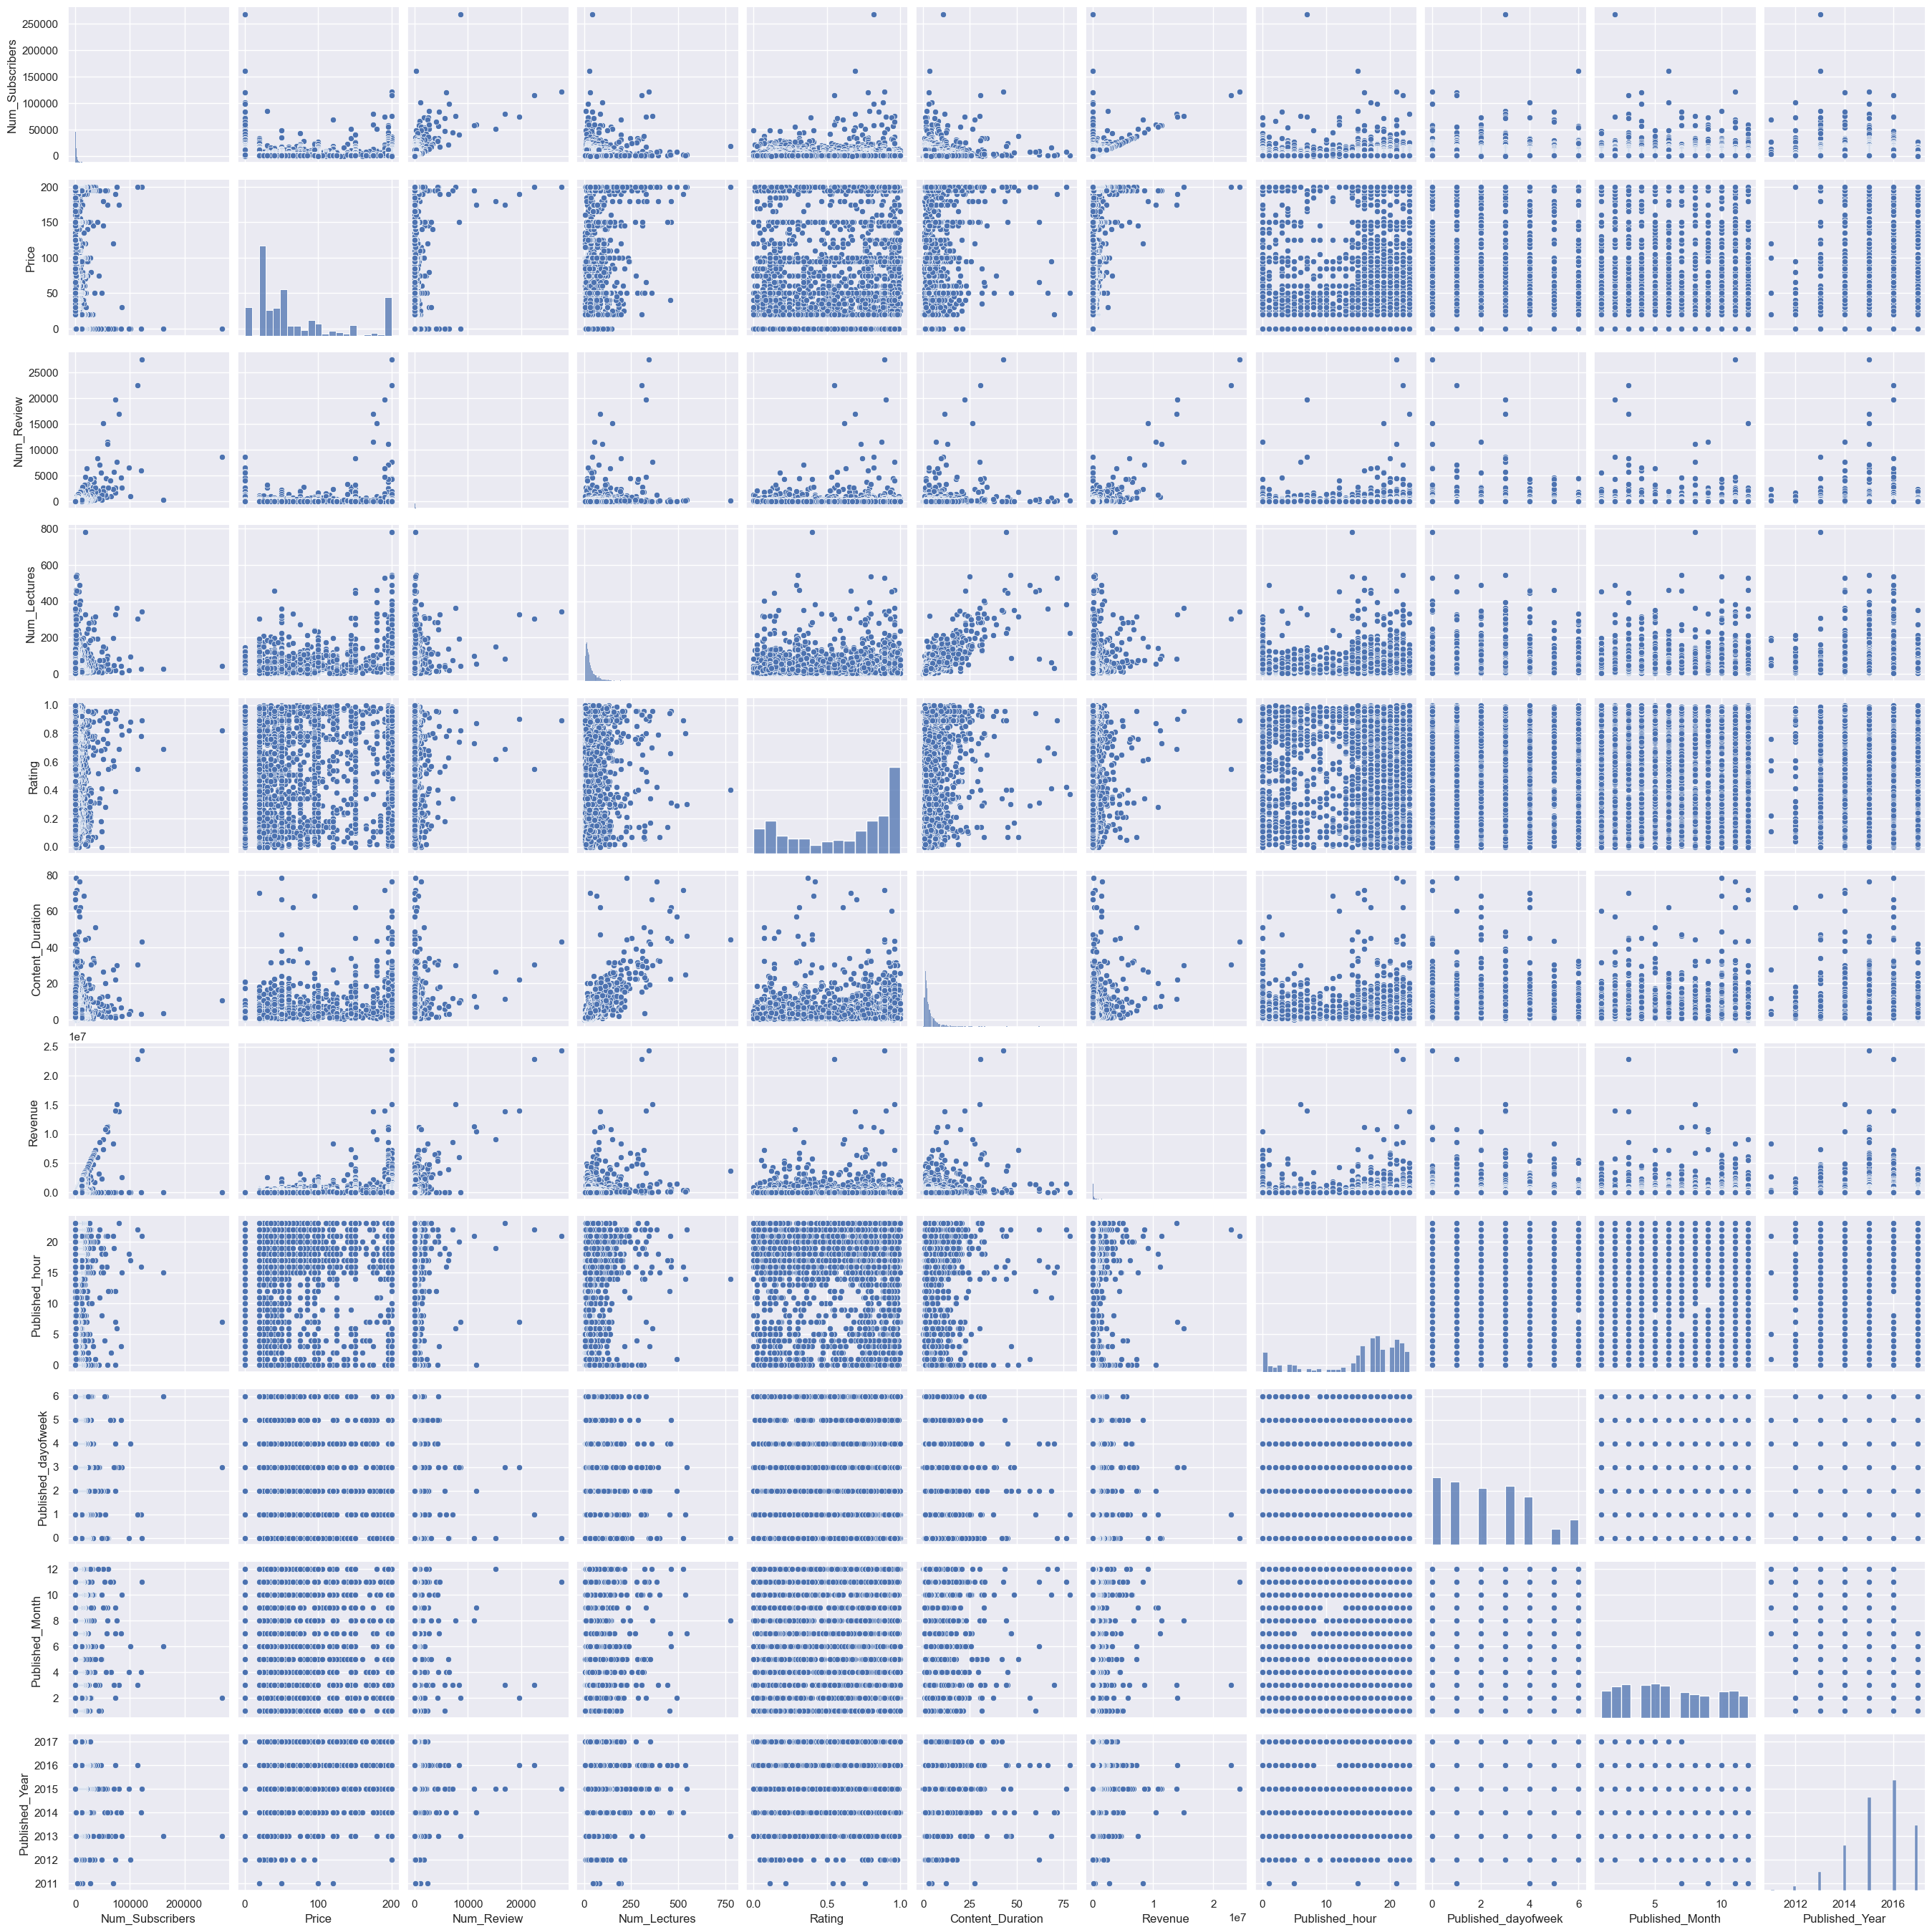

In [35]:
sns.pairplot(data=df);

### Pairplot showing relationships between variables

## 2. Determining the perfomance of each course by- accessing number of subscription, reviews, rating, revenue generated.

### Performance based on the number of subscription over the years, looking into the courses, course field and level.

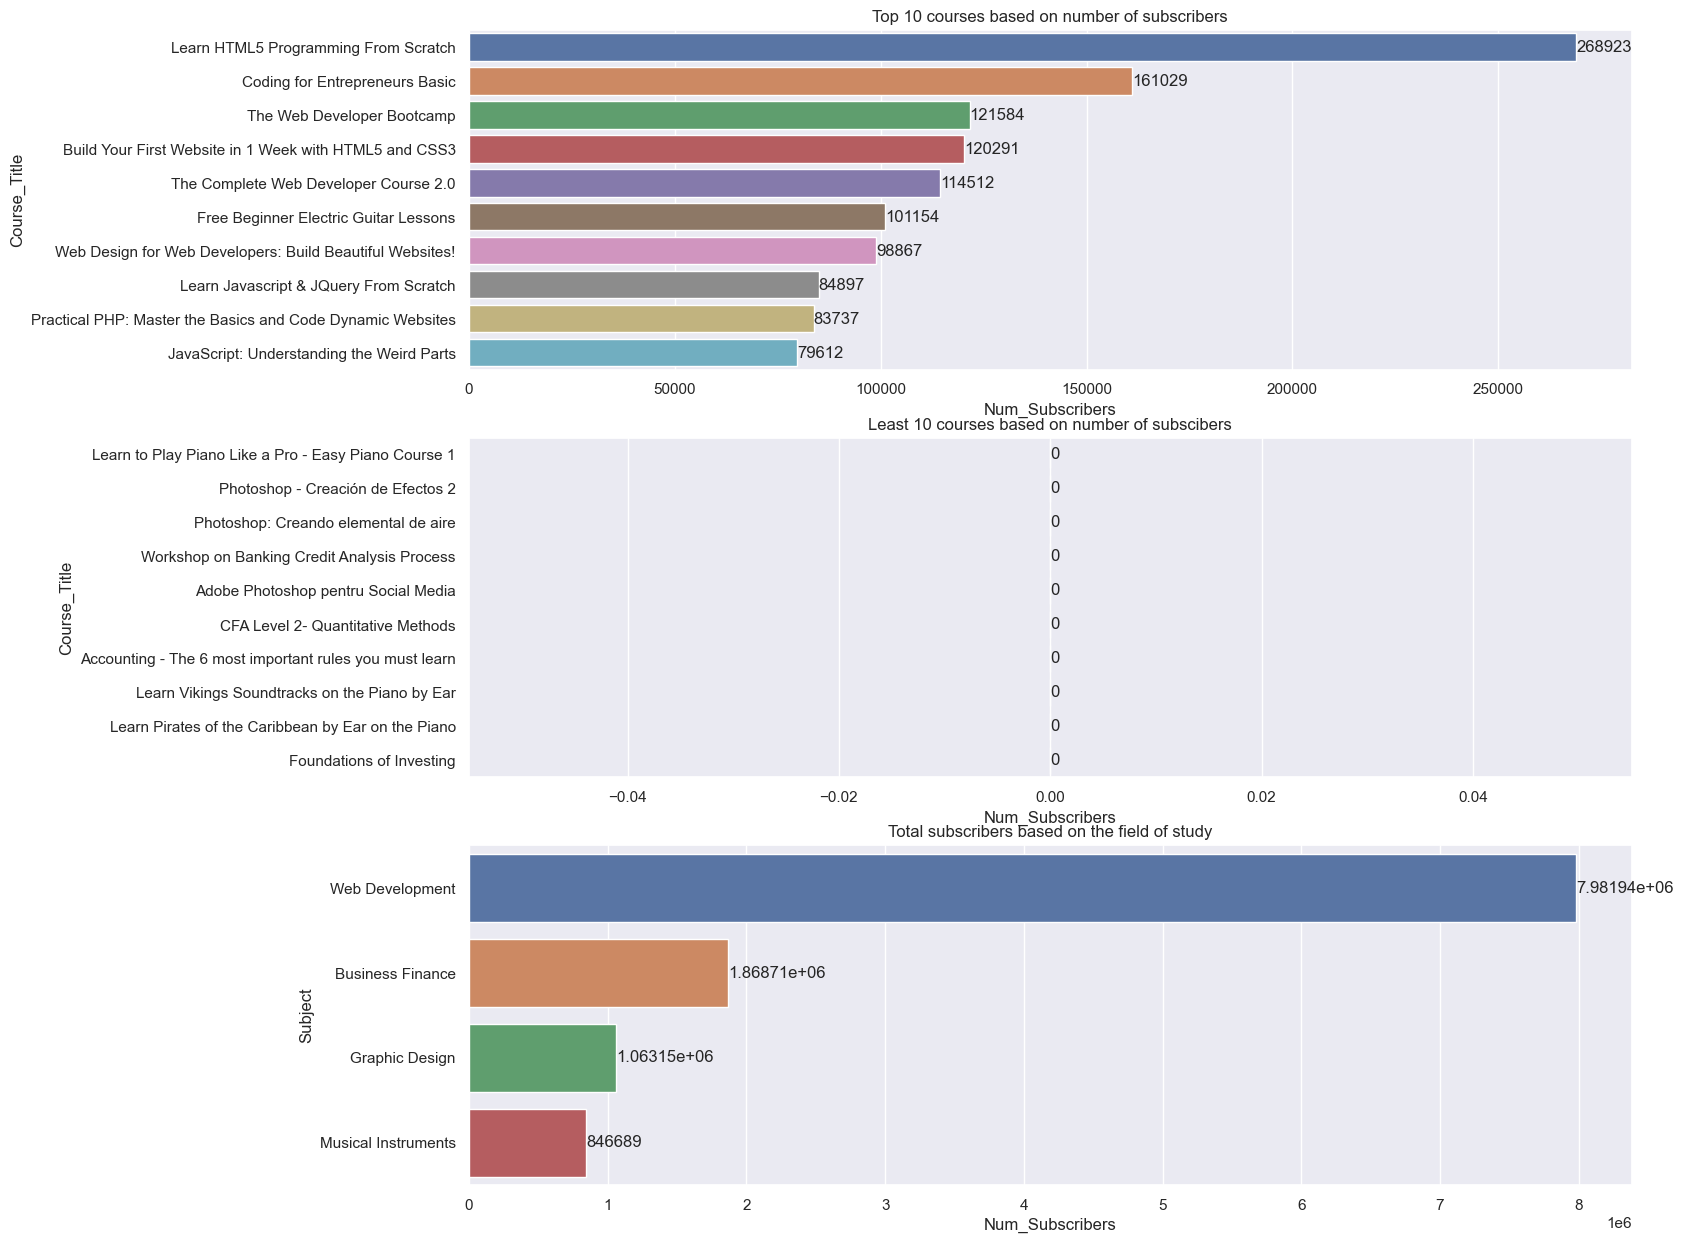

In [36]:
#Looking at the performance of the courses based on their subscription
fig, axs = plt.subplots(3, 1, figsize=(15, 15))
sub =df.groupby('Course_Title')['Num_Subscribers'].sum().sort_values(ascending=False).reset_index().head(10)
ax=sns.barplot(y='Course_Title', data=sub, x='Num_Subscribers', ax=axs[0])
axs[0].set_title('Top 10 courses based on number of subscribers');
values=df["Num_Subscribers"].sort_values
axs[0].bar_label(container=ax.containers[0], label=values, label_type="edge")

sub =df.groupby('Course_Title')['Num_Subscribers'].sum().sort_values(ascending=False).reset_index().tail(10)
ax=sns.barplot(y='Course_Title', data=sub, x='Num_Subscribers', ax=axs[1])
axs[1].set_title('Least 10 courses based on number of subscibers')
values=df["Num_Subscribers"].sort_values
axs[1].bar_label(container=axs[1].containers[0], label=values, label_type="edge");

sub =df.groupby('Subject')['Num_Subscribers'].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(y='Subject', data=sub, x='Num_Subscribers')
ax.set_title('Total subscribers based on the field of study')
values=df["Num_Subscribers"].sort_values
axs[2].bar_label(container=axs[2].containers[0], label=values, label_type="edge");

In [37]:
df.loc[df["Num_Subscribers"] == 268923].head(1)

,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,...,Revenue,Duration_gp,Published_Time,Published_hour,Published_dayofweek,Published_day_name,Published_Month,Published_Mth_name,Published_Year,time_of_day_label
2473,268923,Learn HTML5 Programming From Scratch,0,8629,45,Beginner Level,0.82,10.5,2013-02-14 07:03:41+00:00,Web Development,...,0,<= 26minsShort_Course,07:03:41,7,3,Thursday,2,February,2013,Morning


In [38]:
#Total number of subscribers
Total_subscribers = df["Num_Subscribers"].sum()
Total_subscribers

11760483

In [39]:
#Courses without a subscriber (No Subscription)
no_subscriber=df.loc[df["Num_Subscribers"]== 0]
no_subscriber.head(2)

,Num_Subscribers,Course_Title,Price,Num_Review,Num_Lectures,Level,Rating,Content_Duration,Published_Timestamp,Subject,...,Revenue,Duration_gp,Published_Time,Published_hour,Published_dayofweek,Published_day_name,Published_Month,Published_Mth_name,Published_Year,time_of_day_label
1155,0,Basic Bookkeeping,35,0,12,Beginner Level,0.40,0.733333,2017-05-23 16:20:18+00:00,Business Finance,...,0,<= 26minsShort_Course,16:20:18,16,1,Tuesday,5,May,2017,Afternoon
1156,0,Options Trading Foundation: Your journey to co...,95,0,5,All Levels,0.94,1.000000,2017-07-05 04:41:54+00:00,Business Finance,...,0,<= 26minsShort_Course,04:41:54,4,2,Wednesday,7,July,2017,Night


In [40]:
#Number of courses without a subscriber
no_subscriber["Course_Title"]


1155                                    Basic Bookkeeping
1156    Options Trading Foundation: Your journey to co...
1157                    Core Financial Statement Concepts
1158                    CFA Level 2- Quantitative Methods
1159    Credit concepts and checklist for bankers, cre...
                              ...                        
2468                    Learn to Play Sweet Child of Mine
2469    Coaching Course: Rhythm Instruction for Music ...
2470    Learn Pirates of the Caribbean by Ear on the P...
2471    Learn to Play Piano Like a Pro - Easy Piano Co...
2472                                4 Week Rhythm Mastery
Name: Course_Title, Length: 65, dtype: object

### Insights
### The following course recorded the highest number of subscription, "Learn HTML5 from scratch"(2.28%), "coding for enterpreneurs basic"(1.37%), "web developer bootcamp"(1.03%). Majority of the courses that were subscribed to are  in the field of web development, which covers about 68% of the entire subscription, while the least are in the field of musical instruments((7%), with some of them having no subscription at all. In total about 65 courses have never been subscribed to.

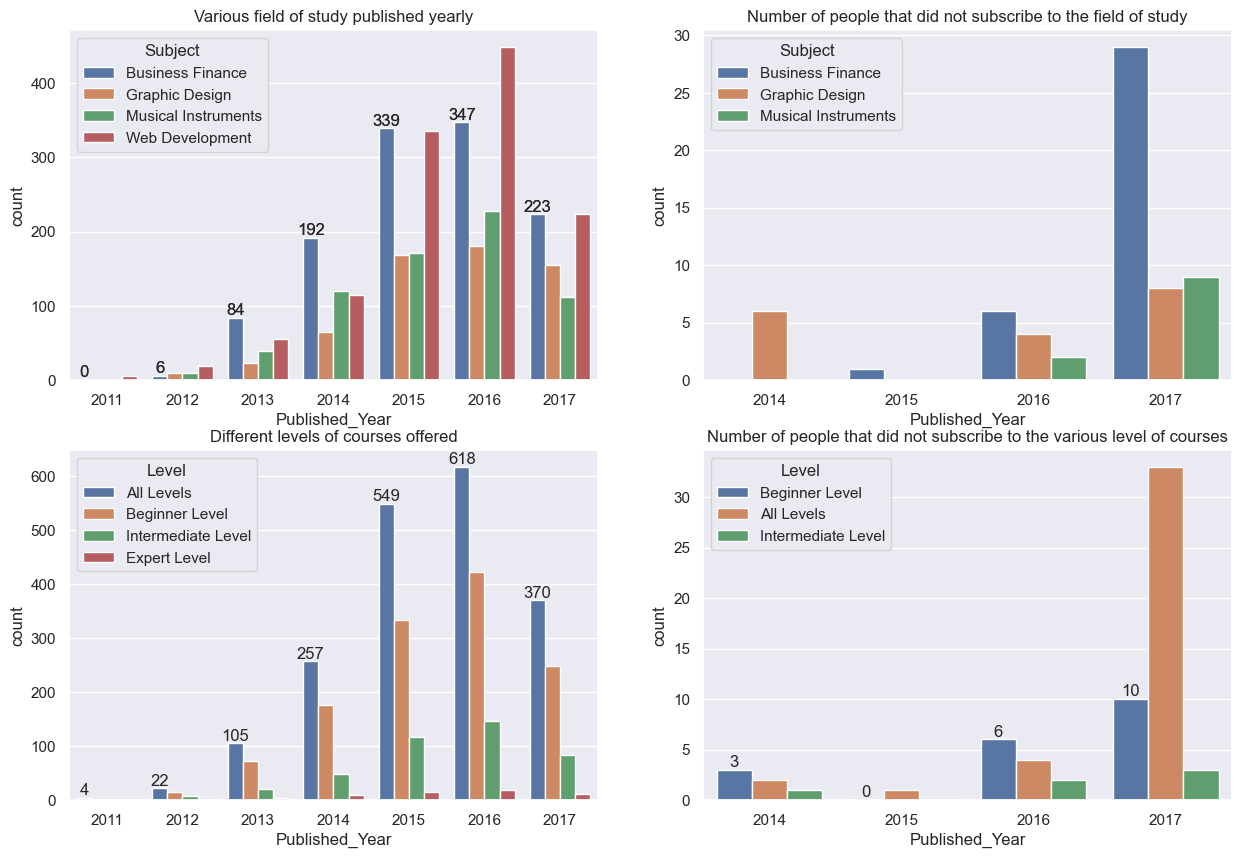

In [70]:
# Looking at their performance over the years based on the field and level of the course
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

ax=sns.countplot(data=df, x="Published_Year", hue="Subject", ax=axs[0,0])
ax.set_title("Various field of study published yearly")
values=df["Published_Year"].value_counts
axs[0,0].bar_label(container=axs[0,0].containers[0], label=values, label_type="edge");

ax=sns.countplot(data=no_subscriber, x="Published_Year", hue="Subject", ax=axs[0,1])
ax.set_title("Number of people that did not subscribe to the field of study")
values=no_subscriber["Published_Year"].value_counts
axs[0,0].bar_label(container=axs[0,0].containers[0], label=values, label_type="edge");

ax=sns.countplot(data=df, x="Published_Year", hue="Level", ax=axs[1,0])
ax.set_title("Different levels of courses offered")
values=df["Published_Year"].value_counts
ax.bar_label(container=axs[1,0].containers[0], label=values, label_type="edge");

ax=sns.countplot(data=no_subscriber, x="Published_Year", hue="Level", ax=axs[1,1])
ax.set_title("Number of people that did not subscribe to the various level of courses")
values=no_subscriber["Published_Year"].value_counts
ax.bar_label(container=axs[1,1].containers[0], label=values, label_type="edge");



plt.show()

In [42]:
#Number of courses published annually
df["Published_Year"].value_counts()

2016    1205
2015    1014
2017     714
2014     492
2013     201
2012      45
2011       5
Name: Published_Year, dtype: int64

In [43]:
#Number of course published annually based on the field of study
df.groupby("Published_Year")["Subject"].value_counts()

Published_Year  Subject            
2011            Web Development          5
2012            Web Development         19
                Graphic Design          10
                Musical Instruments     10
                Business Finance         6
2013            Business Finance        84
                Web Development         55
                Musical Instruments     39
                Graphic Design          23
2014            Business Finance       192
                Musical Instruments    120
                Web Development        115
                Graphic Design          65
2015            Business Finance       339
                Web Development        336
                Musical Instruments    171
                Graphic Design         168
2016            Web Development        449
                Business Finance       347
                Musical Instruments    228
                Graphic Design         181
2017            Web Development        224
                Bu

In [44]:
#Number of courses published annually based on the level of skill
df.groupby("Published_Year")["Level"].value_counts()

Published_Year  Level             
2011            All Levels              4
                Beginner Level          1
2012            All Levels             22
                Beginner Level         15
                Intermediate Level      7
                Expert Level            1
2013            All Levels            105
                Beginner Level         72
                Intermediate Level     20
                Expert Level            4
2014            All Levels            257
                Beginner Level        177
                Intermediate Level     48
                Expert Level           10
2015            All Levels            549
                Beginner Level        334
                Intermediate Level    117
                Expert Level           14
2016            All Levels            618
                Beginner Level        423
                Intermediate Level    146
                Expert Level           18
2017            All Levels            370

### Insights

### In 2011, the company published a total of 5 courses which were all in web development, 1 was designed for beginners and 4 for all the levels, all the courses published that year had 100% subscription
### In 2012, the company published a total 45 courses across the following field of study, Web Developement Business Finance, musical instruments and graphic design,the courses were taught at all the levels of study, all the courses had 100% subscription.
### In 2013, a total of 201 courses were published and they all had 100% subscription. 
### In 2014, 492 were published, majority(39%) of the courses were in the field of Business finance and the least(13%) in the field of Graphics Designs. All the courses had subscribers except 6 courses under the field of Graphic design, 3 of the course are for beginner level.
### In 2015, the courses published was doubled(1,014) and they all had subscribers except for 1 course under business finance which was designed for all level proficiency.
### In 2016 the courses published were increased by almost 20%(1,205), but only web development field recorded 100% subscription among the field of study, also the expert level recorded 100% subscription. 
### In 2017, the company reduced the number of courses published to 714 courses, still only web development courses and the entire expert level courses had 100% subscription.

### Performance based on Number of Reviews

In [45]:
#Dataframe showing the field of study, number of subscribers and number of reviews
procat = df.groupby("Subject")[["Num_Subscribers", "Num_Review"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Subject", var_name="Metric", value_name="Total")
procat

,Subject,Metric,Total
0,Business Finance,Num_Subscribers,1868711
1,Graphic Design,Num_Subscribers,1063148
2,Musical Instruments,Num_Subscribers,846689
3,Web Development,Num_Subscribers,7981935
4,Business Finance,Num_Review,75902
5,Graphic Design,Num_Review,37070
6,Musical Instruments,Num_Review,31724
7,Web Development,Num_Review,429899


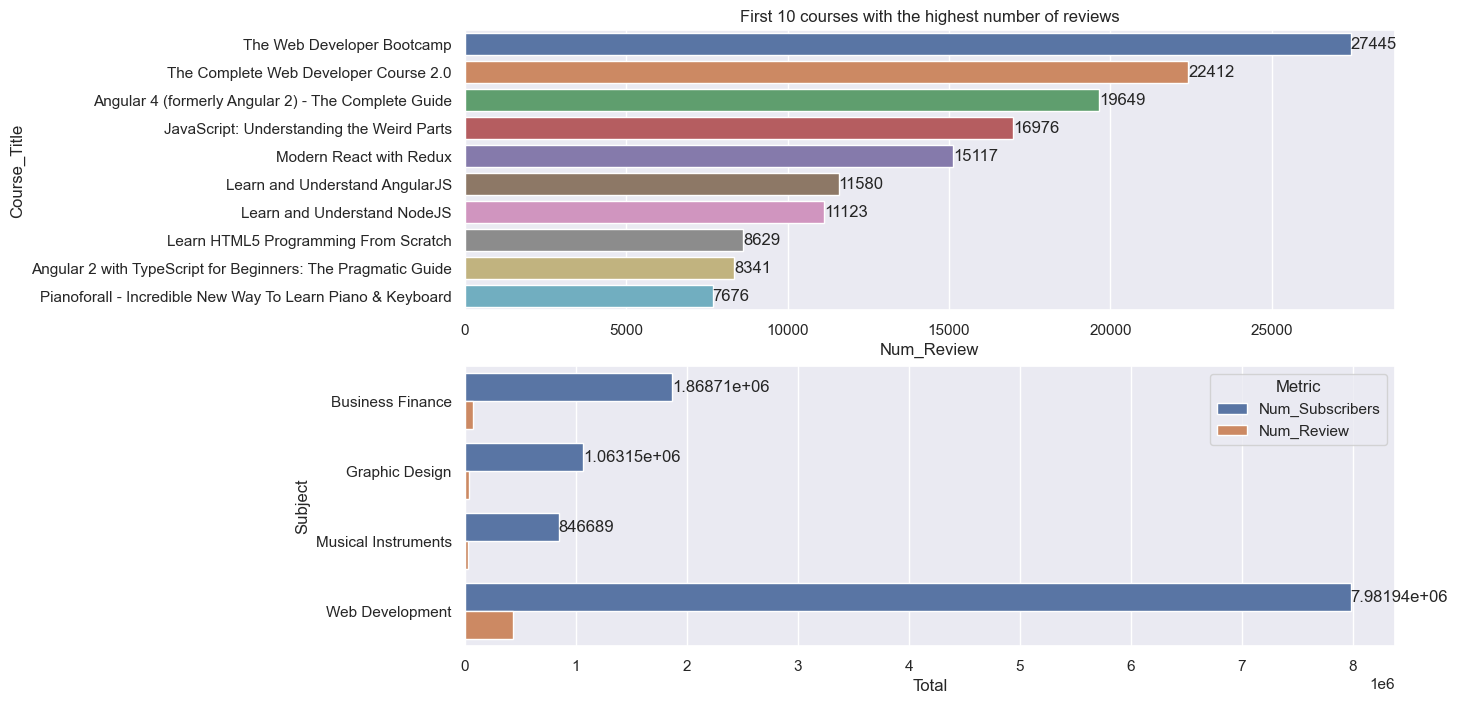

In [46]:
#Plot showing the first 10 sourse with the highest reviews
fig, axs=plt.subplots(2, 1, figsize=(12, 8))
sub =df.groupby('Course_Title')['Num_Review'].sum().sort_values(ascending=False).reset_index().head(10)
ax=sns.barplot(y='Course_Title', data=sub, x='Num_Review', ax=axs[0])
values=df["Num_Review"]
axs[0].set_title('First 10 courses with the highest number of reviews')
axs[0].bar_label(container=ax.containers[0], label=values, label_type="edge");

ax=sns.barplot(data=procat, y ="Subject", x="Total", hue="Metric" , ax=axs[1])
values=procat["Total"]
axs[1].bar_label(container=ax.containers[0], label=values, label_type="edge");

### Insights

### The course with the highest(4.8%) number of reviews is "The web developer bootcamp" followed by The complete web developer course 2.0". Generally the number of reviews to subscribers is very low, e.g in web development field which records the highest subscription, only 3.8% of them dropped a review

In [47]:
#TotalNumber Reviews
df["Num_Review"].sum()

574595

### Performance based on Rating

In [48]:
#Dataframe of tatal rating of courses by the field of study
rate = df.groupby("Subject")["Rating"].sum().sort_values().reset_index()
rate = pd.melt(rate, id_vars="Subject", var_name="Metric", value_name="Total")
rate

,Subject,Metric,Total
0,Musical Instruments,Rating,210.06
1,Graphic Design,Rating,439.69
2,Web Development,Rating,773.59
3,Business Finance,Rating,822.21


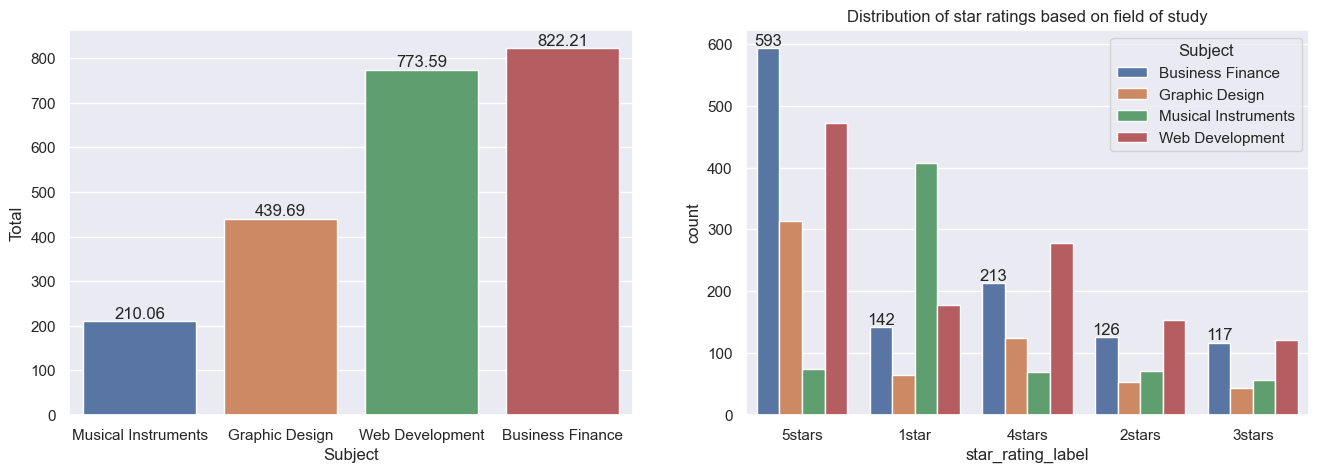

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))

ax=sns.barplot(data=rate, x="Subject", y="Total", ax=axs[0])
plt.title("Rating by the field of study")
values=rate["Subject"]
axs[0].bar_label(container=axs[0].containers[0], label=values, label_type="edge");


ax=sns.countplot(data=df, x="star_rating_label", hue="Subject", ax=axs[1],order=df["star_rating_label"].value_counts(ascending=False).index)
plt.title("Distribution of star ratings based on field of study")
values=df["star_rating_label"].value_counts
axs[1].bar_label(container=axs[1].containers[0], label=values, label_type="edge");


plt.show()

### insights

### Courses in the field of Business Finance and Web Development are the highest rated courses(5star and 4stars rating) while the least is musical instruments(1star, that is below(0.2)), The distribution of star rating also shows that the musical instrument had a very low eveluation.

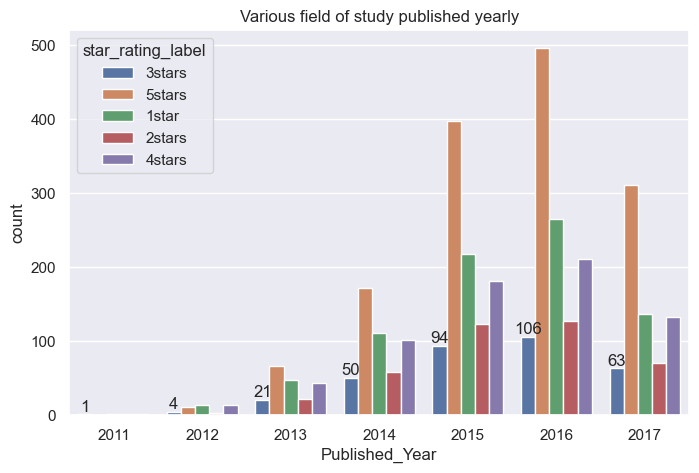

In [50]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df, x="Published_Year", hue="star_rating_label")
ax.set_title("Various field of study published yearly")
values=df["Published_Year"].value_counts
ax.bar_label(container=ax.containers[0], label=values, label_type="edge");



### Insights

### Generally the company's number of ratings dropped in 2017

### Performance based on Revenue generated

In [51]:
#Dataframe showing 10 course title and revenue generated
sub =df.groupby('Course_Title')['Revenue'].sum().sort_values(ascending=False).reset_index().head(10)
sub

,Course_Title,Revenue
0,The Web Developer Bootcamp,24316800
1,The Complete Web Developer Course 2.0,22902400
2,Pianoforall - Incredible New Way To Learn Pian...,15099800
3,Angular 4 (formerly Angular 2) - The Complete ...,14018770
4,JavaScript: Understanding the Weird Parts,13932100
5,Learn and Understand NodeJS,11350560
6,The Complete HTML & CSS Course - From Novice T...,11197290
7,Complete PHP Course With Bootstrap3 CMS System...,10789740
8,Learn and Understand AngularJS,10388175
9,Modern React with Redux,9146700


In [52]:
#Dataframe showing revenue generated by subject
sub2 =df.groupby('Subject')['Revenue'].sum().sort_values(ascending=False).reset_index().head(10)
sub2

,Subject,Revenue
0,Web Development,631082465
1,Business Finance,123735315
2,Graphic Design,76983170
3,Musical Instruments,53359055


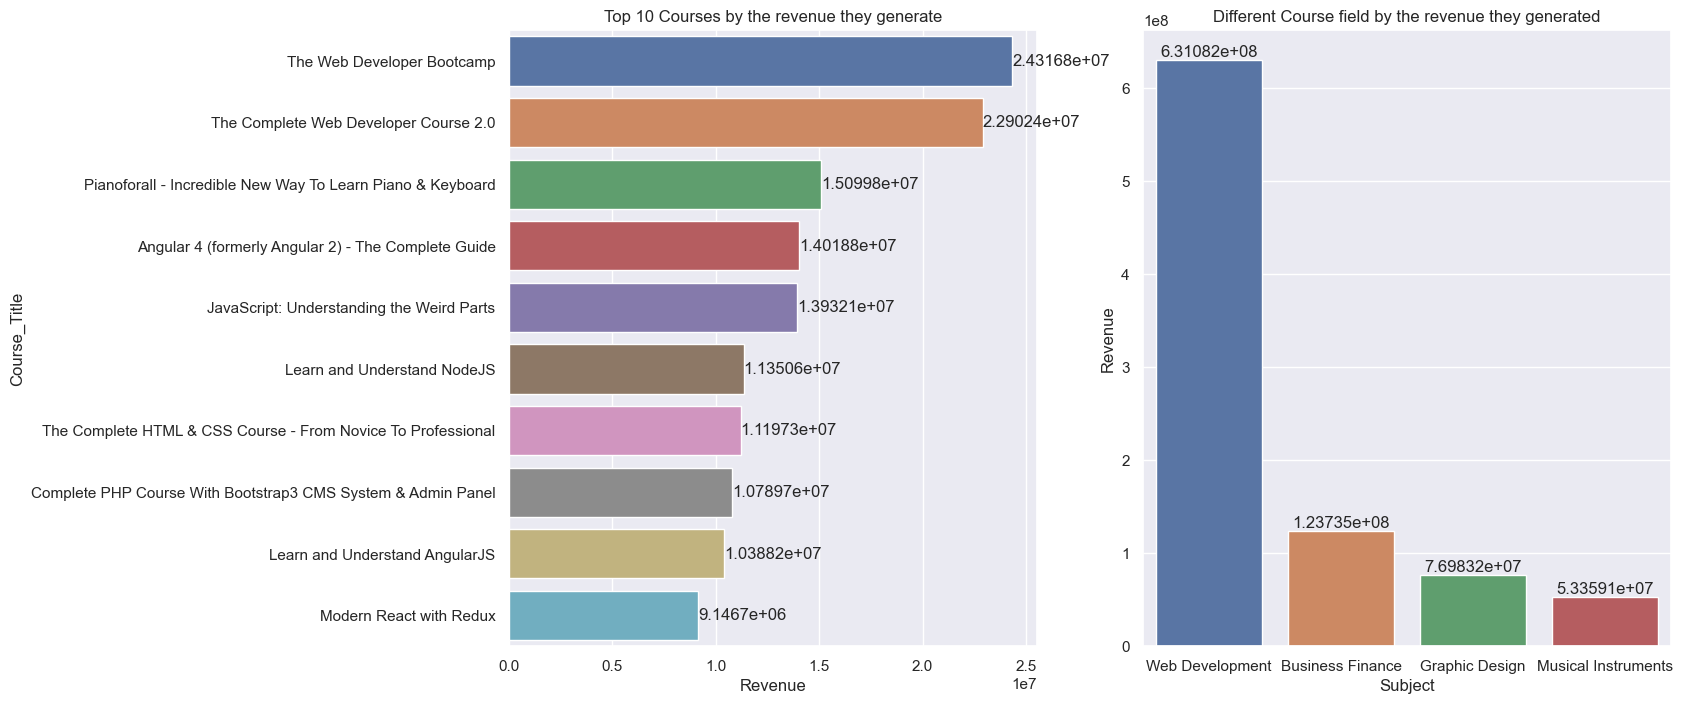

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15,8))
ax=sns.barplot(y='Course_Title', data=sub, x='Revenue',ax=axs[0])
ax.set_title('Top 10 Courses by the revenue they generate')
values=sub["Revenue"]
ax.bar_label(container=axs[0].containers[0], label=values, label_type="edge");


ax=sns.barplot(x='Subject', data=sub2, y='Revenue', ax=axs[1])
axs[1].set_title('Different Course field by the revenue they generated')
values=sub2["Revenue"]
ax.bar_label(container=axs[1].containers[0], label=values, label_type="edge")
                           
plt.show();



In [54]:
#Total Revenue generated by EdSigh from 2011 to 2017
df["Revenue"].sum()

885160005

### Insights

### About 71% of the revenue generated by the company is from the sales of web developement courses, next is business finance courses, which generates about 14% of revenue and the least is musical instrument field (6% revenue).

In [55]:
#Total Revenue made by the company annually
rev = df.groupby("Published_Year")[["Subject", "Revenue"]].sum().sort_values(by="Revenue").reset_index()
rev = pd.melt(rev, id_vars="Published_Year", var_name="Metric", value_name= "Total")
rev

,Published_Year,Metric,Total
0,2011,Revenue,11643420
1,2012,Revenue,11773470
2,2013,Revenue,69405820
3,2017,Revenue,92970175
4,2014,Revenue,107162385
5,2016,Revenue,277694340
6,2015,Revenue,314510395


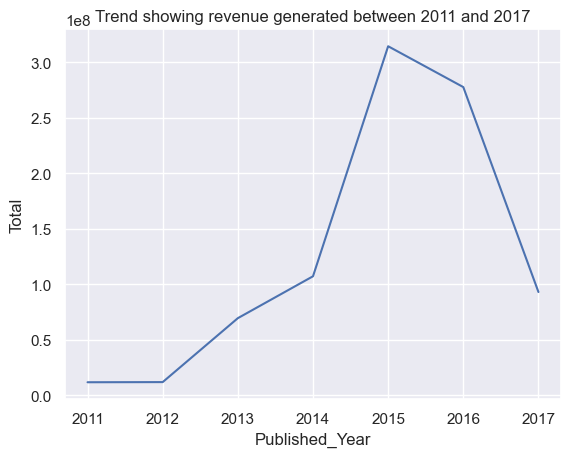

In [56]:
ax=sns.lineplot(x='Published_Year', data=rev, y='Total')
ax.set_title('Trend showing revenue generated between 2011 and 2017');

### Insights

### The revenue generated at EdSigh EdTech went up from 2011 to 2015, after which there was a decline in revenue from about 315million in 2015 to 271million in 2016, and a further decline to about 93million in 2017.

## 3. Relationship between cost of enrolling in a course and number of students enrolled in the course.

In [57]:

av_pri = df.groupby("Published_Year")[["Subject", "Price"]].mean().sort_values(by="Published_Year").reset_index()
av_pri = pd.melt(av_pri, id_vars="Published_Year", var_name="Metric", value_name= "Total")
av_pri

,Published_Year,Metric,Total
0,2011,Price,62.000000
1,2012,Price,40.777778
2,2013,Price,53.656716
3,2014,Price,48.373984
4,2015,Price,66.893491
5,2016,Price,69.925311
6,2017,Price,75.938375


In [58]:
yr_sub = df.groupby("Published_Year")[["Subject", "Num_Subscribers"]].sum().sort_values(by="Published_Year").reset_index()
yr_sub = pd.melt(yr_sub, id_vars="Published_Year", var_name="Metric", value_name= "Total")
yr_sub

,Published_Year,Metric,Total
0,2011,Num_Subscribers,119028
1,2012,Num_Subscribers,555339
2,2013,Num_Subscribers,1680153
3,2014,Num_Subscribers,1952599
4,2015,Num_Subscribers,3475324
5,2016,Num_Subscribers,2977814
6,2017,Num_Subscribers,1000226


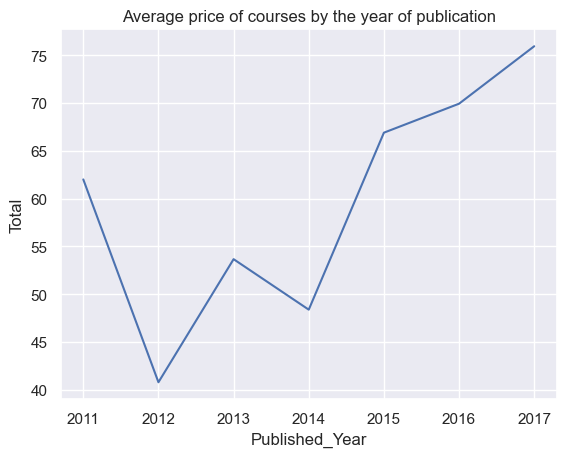

In [59]:

ax=sns.lineplot(x='Published_Year', data= av_pri, y='Total')
ax.set_title('Average price of courses by the year of publication')

plt.show()

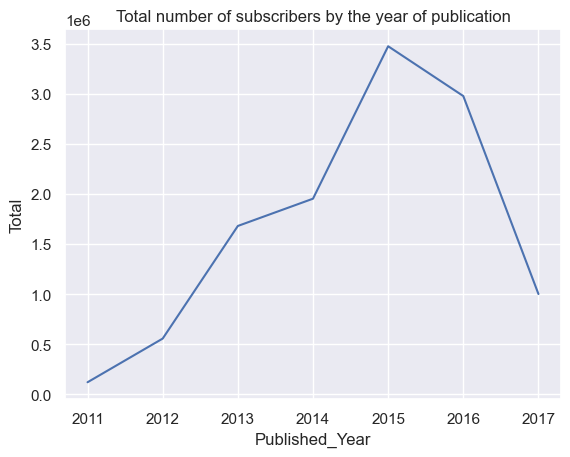

In [60]:
ax=sns.lineplot(x='Published_Year', data= yr_sub, y='Total')
ax.set_title('Total number of subscribers by the year of publication')
plt.show()

### In 2017, there was an increase in average cost of enrolling for a course and in turn a decrease in number of subscribers was observed in the same year.

<Axes: >

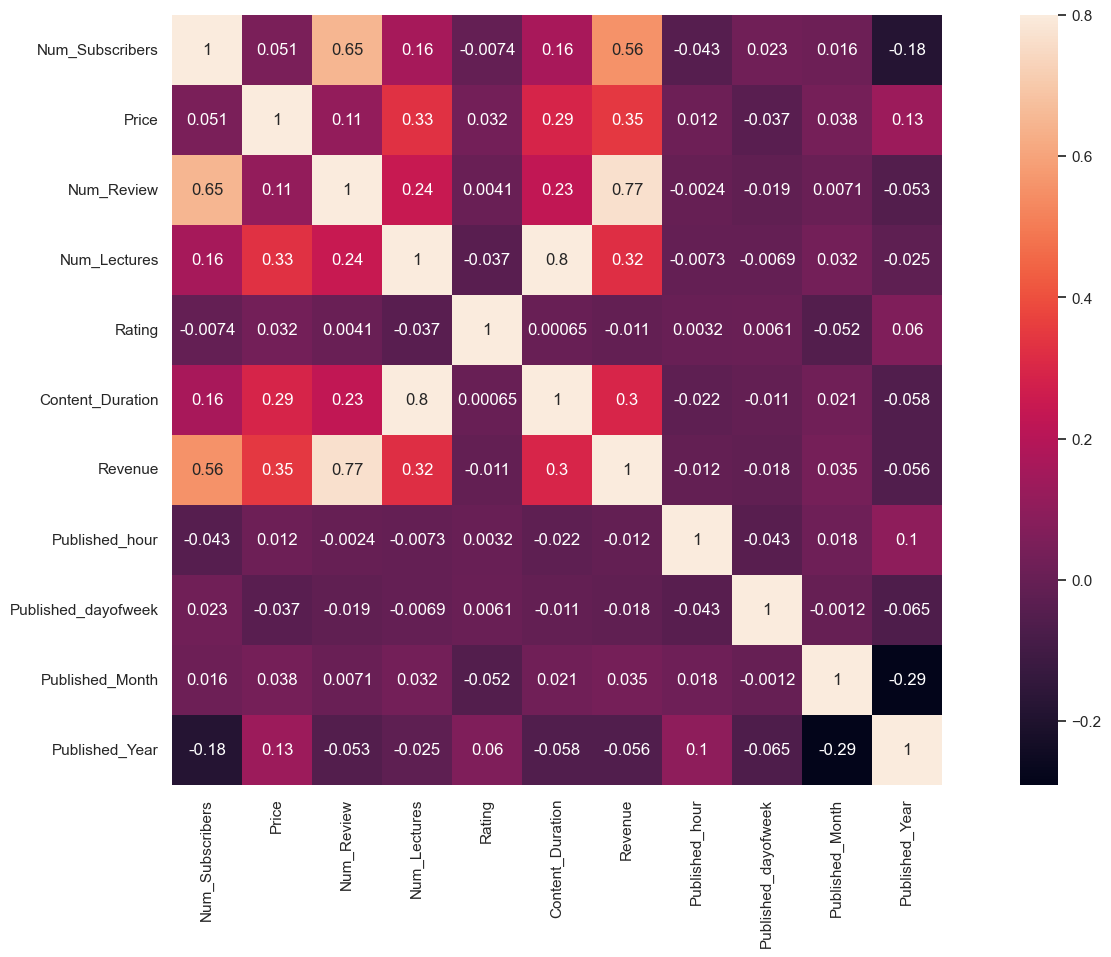

In [61]:
#Heatmap showing the relationship between the variables
a = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(a, vmax=0.8, square=True, annot=True)

### Insights


### There is a very weak positive relationship between price of enrolling for an online course and number of subscribers

### There is a strong positive correlation between Revenue generated and Number of Reviews, & Course duration and Number of lectures. Also a moderate correlation between Revenue generated and Number of Subscribers & Number of Reviews and Number of subscribers.¶

In [62]:

from scipy.stats import pearsonr

In [63]:
cost_price = df["Price"]
subscribers = df["Num_Subscribers"]

In [64]:
correlation_coefficient, p_value = pearsonr(cost_price, subscribers)
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.05055489674717021
P-value: 0.002168977518213111


### Insights

### The p-value is approximately 0.0022 (<0.05), therefore the correlation is statistically significant. The correlation is unlikely to occur by chance , it is more likely to reflect a genuine relationship between the cost of enrolling for a course and number of subscribers.

## RECOMMENDATIONS

## Based on the insights above:

### EdSigh Ed-Tech is doing excellently well in web development field of study, and Expert Level courses across all the field of studies, despite the increase in course price and a drop-in revenue generated in 2017, 100% subscription was recorded in these areas of studies all through the years. The of musical instrument is not performing well. A change in cost of enrolling may affect the number of subscribers generally. 

## Therefore I recommend, the following
:
### -Publish more courses in the field of Web development as they are highly sort after and generate a lot of revenue.
### - Focus the course titles in the field of musical instruments around the ones that are highly subscribed to under this field.
### -The courses under the Expert level are few compared to other levels, increasing the number of Expert level courses will increase company’s revenue, since they are highly sort after.
### -Increasing cost of enrolling for a course affected subscription, therefore the cost of enrolling should be reduced except for courses under Web development and those under the Expert Level.
### -Always request for written out feedbacks along side with the ratings to enable one understand why a course is rated high or low, for proper evaluation.

## Challenges
### -Information on course quality and written feedback were not provided.
